In [1]:
#imports
import tensorflow as tf
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

In [13]:
#dataset
with open('/tmp/sarcasm.json', 'r') as f:
  dataset = json.load(f)

x_sentences = []
y_labels = []

for item in dataset:
  x_sentences.append(item['headline'])
  y_labels.append(item['is_sarcastic'])

In [29]:
#split dataset to train & test
train_size = round(len(dataset) * 0.8)

x_train = x_sentences[0:train_size]
x_test = x_sentences[train_size:]
y_train = y_labels[0:train_size]
y_test = y_labels[train_size:]

In [31]:
#text to numeric encoding
#tokenization & padding
tokenizer = Tokenizer(num_words=10000, oov_token='<00V>', lower=True)
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train_seq, maxlen=100, padding='post', truncating='post')

x_test_seq = tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test_seq, maxlen=100, padding='post', truncating='post')

In [33]:
#model architecture 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [39]:
#converting py array to np array
x_train_pad = np.array(x_train_pad)
y_train = np.array(y_train)
x_test_pad = np.array(x_test_pad)
y_test = np.array(y_test)

In [40]:
#fit model
epoch_runs = 20

hist = model.fit(x_train_pad, y_train, epochs=epoch_runs, validation_data=(x_test_pad, y_test), verbose=2)

Epoch 1/20
668/668 - 4s - loss: 0.6586 - accuracy: 0.5954 - val_loss: 0.5468 - val_accuracy: 0.7278 - 4s/epoch - 5ms/step
Epoch 2/20
668/668 - 2s - loss: 0.4056 - accuracy: 0.8427 - val_loss: 0.3837 - val_accuracy: 0.8325 - 2s/epoch - 4ms/step
Epoch 3/20
668/668 - 2s - loss: 0.2987 - accuracy: 0.8832 - val_loss: 0.3487 - val_accuracy: 0.8545 - 2s/epoch - 3ms/step
Epoch 4/20
668/668 - 2s - loss: 0.2506 - accuracy: 0.9027 - val_loss: 0.3440 - val_accuracy: 0.8564 - 2s/epoch - 3ms/step
Epoch 5/20
668/668 - 2s - loss: 0.2171 - accuracy: 0.9167 - val_loss: 0.3509 - val_accuracy: 0.8540 - 2s/epoch - 3ms/step
Epoch 6/20
668/668 - 2s - loss: 0.1910 - accuracy: 0.9286 - val_loss: 0.3755 - val_accuracy: 0.8448 - 2s/epoch - 4ms/step
Epoch 7/20
668/668 - 2s - loss: 0.1699 - accuracy: 0.9364 - val_loss: 0.3915 - val_accuracy: 0.8433 - 2s/epoch - 3ms/step
Epoch 8/20
668/668 - 2s - loss: 0.1538 - accuracy: 0.9440 - val_loss: 0.3930 - val_accuracy: 0.8519 - 2s/epoch - 4ms/step
Epoch 9/20
668/668 - 2s 

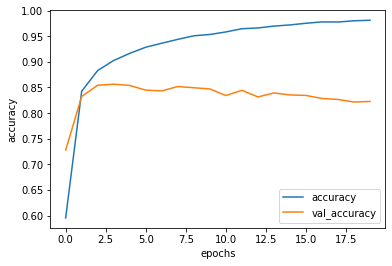

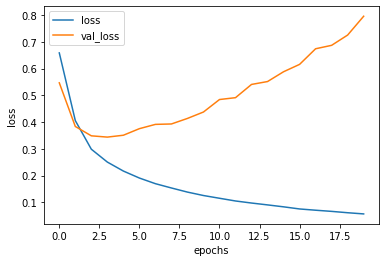

In [41]:
# accuracy & loss 

def create_graphs(history, string):
  plt.plot(hist.history[string])
  plt.plot(hist.history['val_' + string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

create_graphs(hist, 'accuracy')
create_graphs(hist, 'loss')